<a href="https://colab.research.google.com/github/miladziekanowska/stock-market-forecast-project/blob/main/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing libraries and fixing problems with Talib ;)**

In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!sudo make install
os.chdir('../')
!pip install TA-Lib

--2023-08-21 16:30:33--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-21 16:30:33--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-21 16:30:33--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [2]:
pip install Yahoo_fin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=a02a700332cae3f663acad19e4467160e15db859ca42ba0a93c3d39a29a5dfb8
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=82d2cfb89b5ed0d0503eaf4b5cc0bf0d90a0c8970ffa79c22d0c4e449126136f
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existing 

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as yh
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as web
import matplotlib.dates as mdates
pd.set_option('display.max_columns', 20)

In [32]:
ticker_list = yh.tickers_dow()
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = yh.get_data(ticker, start_date="13/07/1993", end_date='now', index_as_date = True, interval="1d")

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:35: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  start_seconds = int(pd.Timestamp(start_date).timestamp())
/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:35: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  start_seconds = int(pd.Timestamp(start_date).timestamp())
/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:35: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  start_seconds = int(pd.Timestamp(start_date).timestamp())
/usr/local/lib/python3.10/dist-packages/yahoo_

In [33]:
historical_datas['AAPL']

,open,high,low,close,adjclose,volume,ticker
1993-07-13,0.345982,0.345982,0.330357,0.332589,0.273050,158110400,AAPL
1993-07-14,0.328125,0.334821,0.319196,0.332589,0.273050,246299200,AAPL
1993-07-15,0.332589,0.337054,0.314732,0.319196,0.262054,338038400,AAPL
1993-07-16,0.254464,0.264509,0.236607,0.245536,0.201581,2120596800,AAPL
1993-07-19,0.250000,0.256696,0.227679,0.228795,0.187837,806232000,AAPL
...,...,...,...,...,...,...,...
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600,AAPL
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900,AAPL
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900,AAPL
2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200,AAPL


**RSI**

In [34]:
historical_datas['AAPL']['RSI'] = ta.RSI(historical_datas['AAPL']['close'].tail(400))

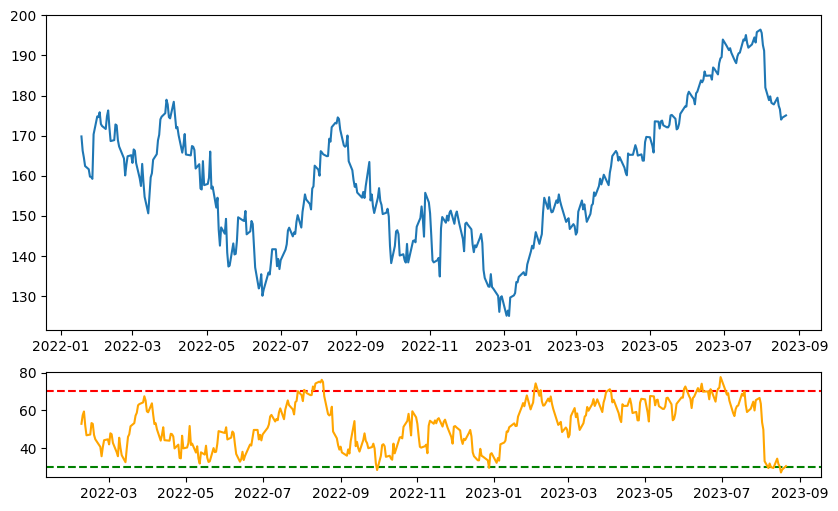

In [35]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['RSI'].tail(400), color='orange')

In [36]:
historical_datas['AAPL']['RSI_signal'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

rsi_values = historical_datas['AAPL']['RSI']
rsi_signals = []

#Dopisanie sygnałów do kolumny RSI_signals
for rsi in rsi_values:
    if rsi < 30:
        rsi_signals.append('BUY')
    elif rsi > 70:
        rsi_signals.append('SELL')
    else:
        rsi_signals.append('HOLD')

historical_datas['AAPL']['RSI_signal'] = rsi_signals


In [37]:
historical_datas['AAPL'].tail(30)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal
2023-07-11,189.160004,189.300003,186.600006,188.080002,187.826370,46638100,AAPL,57.015448,HOLD
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.514084,60750200,AAPL,60.669619,HOLD
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.283035,41342300,AAPL,62.244468,HOLD
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.432846,41573900,AAPL,62.559009,HOLD
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.728394,50520200,AAPL,68.730590,HOLD
2023-07-18,193.350006,194.330002,192.419998,193.729996,193.468735,48353800,AAPL,67.782549,HOLD
2023-07-19,193.100006,198.229996,192.649994,195.100006,194.836899,80507300,AAPL,70.121168,SELL
2023-07-20,195.089996,196.470001,192.500000,193.130005,192.869553,59581200,AAPL,63.035500,HOLD
2023-07-21,194.100006,194.970001,191.229996,191.940002,191.681168,71917800,AAPL,59.147434,HOLD
2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800,AAPL,60.914624,HOLD


**MACD**

<ipython-input-38-84bafb70b62c>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(historical_datas['AAPL']['MACD_signalline'], 'b-', color='red')


<BarContainer object of 400 artists>

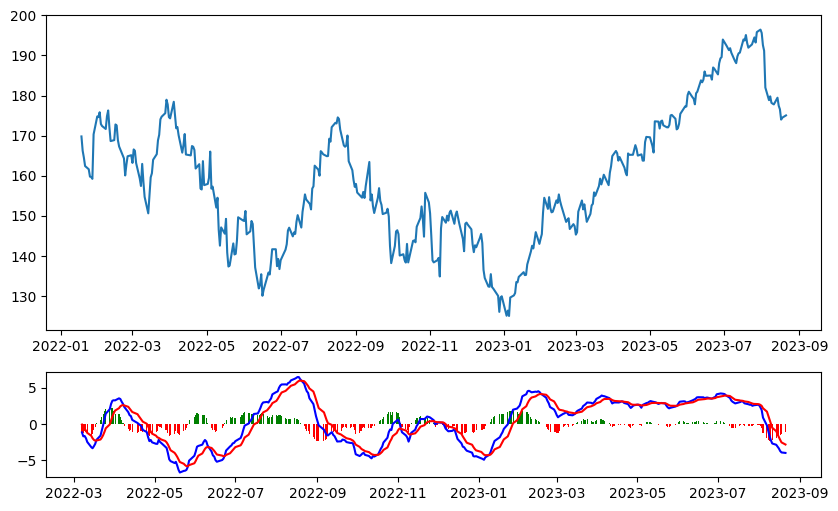

In [38]:
historical_datas['AAPL']['MACD'], historical_datas['AAPL']['MACD_signalline'], macd_hist = ta.MACD(historical_datas['AAPL']['close'].tail(400))

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].plot(historical_datas['AAPL']['MACD'], 'b-')
axs[1].plot(historical_datas['AAPL']['MACD_signalline'], 'b-', color='red')
axs[1].bar(macd_hist.index, macd_hist, color=c)

In [39]:
historical_datas['AAPL'].tail(50)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,MACD,MACD_signalline
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.715973,48870700,AAPL,67.257805,HOLD,3.052306,2.918317
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900,AAPL,71.787304,SELL,3.277234,2.990100
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100,AAPL,70.018050,SELL,3.377821,3.067644
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900,AAPL,71.042818,SELL,3.469190,3.147953
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200,AAPL,74.110190,SELL,3.665570,3.251477
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.670624,101235600,AAPL,69.891501,HOLD,3.690705,3.339322
2023-06-20,184.410004,186.100006,184.410004,185.009995,184.760498,49799100,AAPL,70.043130,SELL,3.675517,3.406561
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.711929,49515700,AAPL,65.874866,HOLD,3.537972,3.432843
2023-06-22,183.740005,187.050003,183.669998,187.000000,186.747818,51245300,AAPL,71.215796,SELL,3.632397,3.472754
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300,AAPL,69.974279,HOLD,3.639454,3.506094


In [40]:

signals = []
position = 'HOLD'

for i in range(len(historical_datas['AAPL'])):
    if i == 0:
        signals.append(position)
    else:
        if historical_datas['AAPL']['MACD'][i] > historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] <= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'BUY'
        elif historical_datas['AAPL']['MACD'][i] < historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] >= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'SELL'
        else:
            position = 'HOLD'

        signals.append(position)

historical_datas['AAPL']['MACD_signal'] = signals


**Williams %R**

In [41]:
historical_datas['AAPL']['WillR'] = ta.WILLR(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

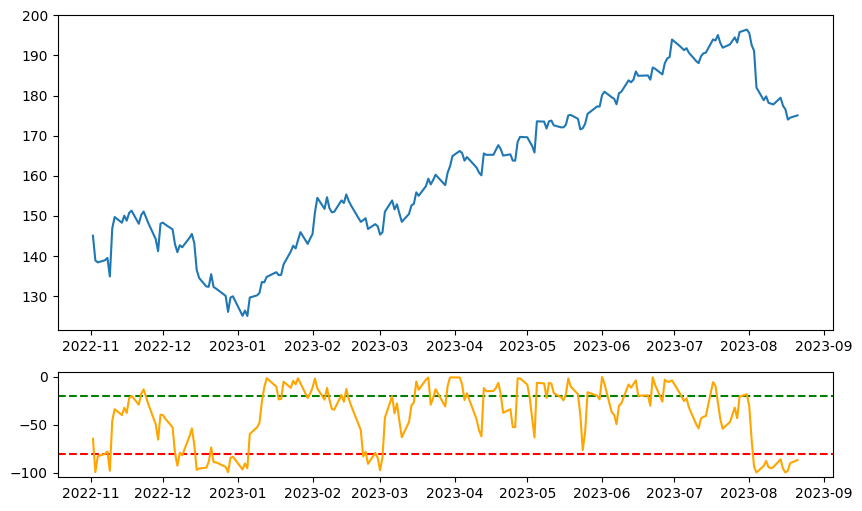

In [42]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=-80, color='r', linestyle='--')
axs[1].axhline(y=-20, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['WillR'].tail(200), color='orange')

In [43]:
historical_datas['AAPL']['WillR_signal'] = 'HOLD'

willr_values = historical_datas['AAPL']['WillR']
willr_signals = []


for willr in willr_values:
    if willr < -80:
        willr_signals.append('BUY')
    elif willr > -20:
        willr_signals.append('SELL')
    else:
        willr_signals.append('HOLD')

historical_datas['AAPL']['WillR_signal'] = willr_signals

In [44]:
historical_datas['AAPL'].tail(50)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,MACD,MACD_signalline,MACD_signal,WillR,WillR_signal
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.715973,48870700,AAPL,67.257805,HOLD,3.052306,2.918317,HOLD,-27.650674,HOLD
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900,AAPL,71.787304,SELL,3.277234,2.990100,HOLD,-8.038837,SELL
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100,AAPL,70.018050,SELL,3.377821,3.067644,HOLD,-11.365213,SELL
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900,AAPL,71.042818,SELL,3.469190,3.147953,HOLD,-7.541481,SELL
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200,AAPL,74.110190,SELL,3.665570,3.251477,HOLD,-3.803204,SELL
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.670624,101235600,AAPL,69.891501,HOLD,3.690705,3.339322,HOLD,-19.865717,SELL
2023-06-20,184.410004,186.100006,184.410004,185.009995,184.760498,49799100,AAPL,70.043130,SELL,3.675517,3.406561,HOLD,-19.354925,SELL
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.711929,49515700,AAPL,65.874866,HOLD,3.537972,3.432843,HOLD,-30.119234,HOLD
2023-06-22,183.740005,187.050003,183.669998,187.000000,186.747818,51245300,AAPL,71.215796,SELL,3.632397,3.472754,HOLD,-0.513906,SELL
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300,AAPL,69.974279,HOLD,3.639454,3.506094,HOLD,-8.593806,SELL


**CCI**

In [45]:
historical_datas['AAPL']['CCI'] = ta.CCI(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

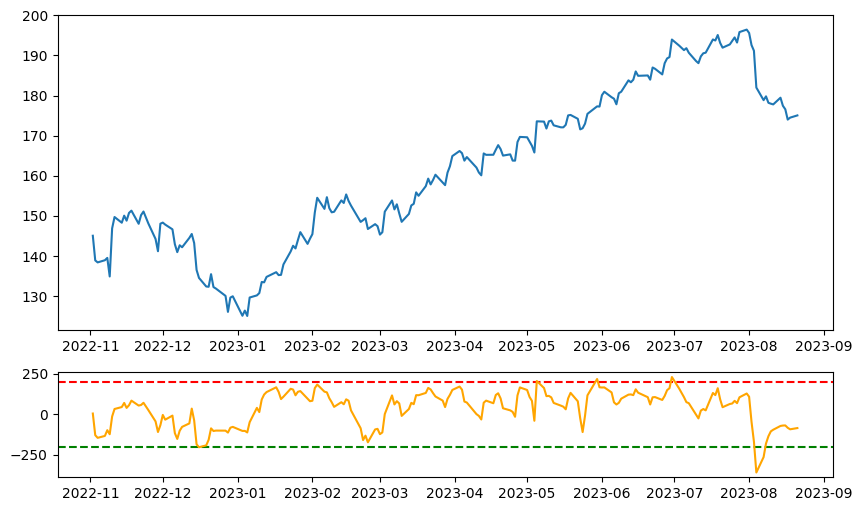

In [46]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=200, color='r', linestyle='--')
axs[1].axhline(y=-200, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['CCI'].tail(200), color='orange')

In [47]:
historical_datas['AAPL']['CCI_signals'] = 'HOLD'

cci_values = historical_datas['AAPL']['CCI']
cci_signals = []


for cci in cci_values:
    if cci > 200 :
        cci_signals.append('BUY')
    elif cci < -200:
        cci_signals.append('SELL')
    else:
        cci_signals.append('HOLD')

historical_datas['AAPL']['CCI_signals'] = cci_signals

**BOP**

In [48]:
historical_datas['AAPL']['BOP'] = ta.BOP(historical_datas['AAPL']['open'], historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

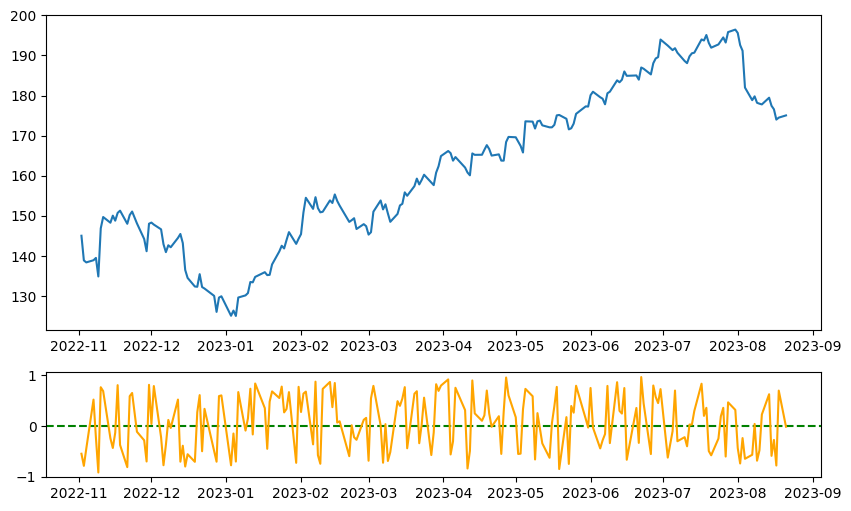

In [49]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=0, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['BOP'].tail(200), color='orange')

In [50]:
historical_datas['AAPL']['BOP_signals'] = 'HOLD'

bop_values = historical_datas['AAPL']['BOP']
bop_signals = []


for bop in bop_values:
    if bop > 0 :
        bop_signals.append('BUY')
    elif bop < 0:
        bop_signals.append('SELL')
    else:
        bop_signals.append('HOLD')

historical_datas['AAPL']['BOP_signals'] = bop_signals

In [ ]:
historical_datas['AAPL'].tail(50)